In [4]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import warnings

from colorama import Fore, Back, Style

warnings.filterwarnings('ignore')

In [5]:
conn=sqlite3.connect('bdd.sqlite')

In [7]:
path = os.getcwd()
print(f"Le répertoire courant est : {path} \n")

Le répertoire courant est : /home/mikaleff 



In [41]:
print("\n")  
print (f"{Fore.YELLOW}------------------------------ Récupération des fichiers ------------------------------{Style.RESET_ALL}\n")

fns=glob.glob('**/fao_2013/*.csv', recursive=True)
nameModificateur=['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']

df_bigTab = pd.DataFrame(columns=['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'])

for fn in fns:
    fns = fn[13:-4]
    df=pd.read_csv(fn, names=nameModificateur, header=0)
    print(f"- {fn:50s} ({df.shape[0]:6d}, {df.shape[1]:2d}) - {Fore.BLACK}{Back.CYAN}{fns}{Style.RESET_ALL}")
    df_bigTab=df_bigTab.append(df)
    
print (f"{Fore.YELLOW}---------------------------------------------------------------------------------------{Style.RESET_ALL}\n")
print("\n")



------------------------------ Récupération des fichiers ------------------------------

- Bureau/fao_2013/FAOSTAT_2013_sous_alimentation.csv (   204, 14) - 13/FAOSTAT_2013_sous_alimentation
- Bureau/fao_2013/FAOSTAT_2013_cereal.csv            ( 16057, 14) - 13/FAOSTAT_2013_cereal
- Bureau/fao_2013/FAOSTAT_2013_vegetal.csv           (104871, 14) - 13/FAOSTAT_2013_vegetal
- Bureau/fao_2013/FAOSTAT_2013_animal.csv            ( 37166, 14) - 13/FAOSTAT_2013_animal
- Bureau/fao_2013/FAOSTAT_2013_population.csv        (   175, 14) - 13/FAOSTAT_2013_population
---------------------------------------------------------------------------------------





In [35]:
df_population=df_bigTab.query('Produit == "Population"').loc[:,["Code Pays","Pays","Valeur"]]
df_population=df_population.set_index('Code Pays').sort_values(by="Code Pays", ascending=True)
print(df_population)

                  Pays     Valeur
Code Pays                        
1              Armenia     2977.0
2          Afghanistan    30552.0
3              Albania     3173.0
4              Algeria    39208.0
7               Angola    21472.0
...                ...        ...
256         Luxembourg      530.0
272             Serbia     9511.0
273         Montenegro      621.0
276              Sudan    37964.0
351              China  1416667.0

[175 rows x 2 columns]


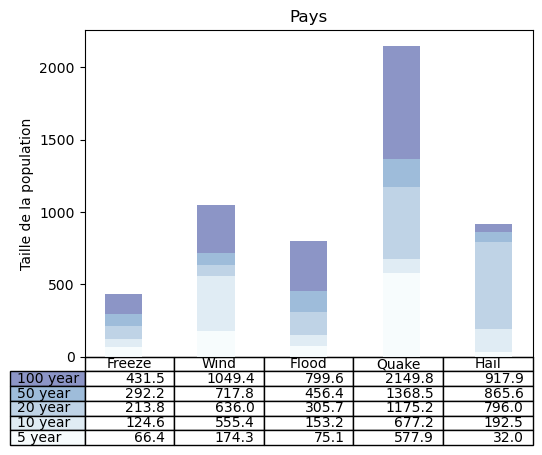

In [29]:
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Code Pays', 'Pays', 'Valeur')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Taille de la population".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Pays')

plt.show()